# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

# 1. Data Loading

We are working with two datasets:
- `loan_applications.csv`: Each row is a **loan application**, with features such as loan type, amount, applicant income, and risk indicators.
- `transaction.csv`: Each row is a **financial transaction**, associated with customers, with transaction type, amount, and a `fraud_flag`.

This structure suggests a 1-to-many relation: one applicant may perform multiple transactions.

## 1.1 Loan Applications DB

In [2]:
df_loan = pd.read_csv("../Data/loan_applications.csv")
df_loan.head()

,application_id,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,...,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,residential_address,applicant_age,gender,number_of_dependents,loan_status,fraud_flag,fraud_type
0,c8bf0bea-70e6-4870-9125-41b8210c527f,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,...,1100.0,3.17,Rented,"94/31, Sehgal Zila, Vadodara-380521, Anantapur...",28,Female,3,Approved,0,NaN
1,91224cec-3544-4bc7-ac15-a9792da54c02,CUST106146,2023-09-23,Car Loan,100000.0,240,13.62,Education,Unemployed,51600.0,...,0.0,0.00,Owned,"H.No. 00, Sheth Chowk, Ichalkaranji 006728, Im...",44,Other,3,Approved,0,NaN
2,4efcd02d-4a03-4ab7-9bd1-0ff430493d0c,CUST100674,2023-05-22,Education Loan,431000.0,60,11.40,Medical Emergency,Self-Employed,14800.0,...,4600.0,31.08,Rented,"H.No. 81, Dutta Path, Kozhikode-340301, Tadepa...",56,Other,4,Approved,0,NaN
3,a61337d4-ba04-4a68-b492-2cb8266e6ed7,CUST106466,2024-07-09,Car Loan,324000.0,120,10.36,Debt Consolidation,Self-Employed,28800.0,...,4000.0,13.89,Rented,"H.No. 022, Rege Road, Tiruvottiyur-927857, Aur...",27,Other,4,Declined,0,NaN
4,a8d1639e-170b-41b2-826a-55c7dae38d16,CUST112319,2023-11-20,Personal Loan,100000.0,36,14.14,Business Expansion,Salaried,43900.0,...,1100.0,2.51,Rented,"85/24, Bali Zila, Sambalpur 922071, Tumkur, Ke...",50,Other,0,Declined,0,NaN


## 1.2 Transactions DB

In [3]:
df_transaction = pd.read_csv("../Data/transactions.csv")
df_transaction.head()

,transaction_id,customer_id,transaction_date,transaction_type,transaction_amount,merchant_category,merchant_name,transaction_location,account_balance_after_transaction,is_international_transaction,device_used,ip_address,transaction_status,transaction_source_destination,transaction_notes,fraud_flag
0,2d7ddfd4-1112-4354-a2dd-fad94b45a850,CUST102188,2022-01-04 11:27:00,Bill Payment,2100.0,Dining,"Rattan, Khanna and Magar","Srikakulam, Himachal Pradesh",8211.0,0,Web,31.102.21.141,Success,BCHG80012468703731,Payment for Dining,0
1,ba998721-a612-4e0a-8354-46d001e9c39c,CUST107144,2022-01-03 23:52:00,UPI,1400.0,Travel,Chauhan LLC,"Giridih, Manipur",12858.0,0,Web,176.48.222.166,Success,CJPZ11841095072972,Payment for Travel,0
2,0b4ad8e2-40ac-49c9-b59a-c9efaaccc7a6,CUST102126,2022-01-15 06:54:00,Debit Card,1000.0,Entertainment,Halder-Sarma,"Avadi, Kerala",19268.0,0,ATM,181.62.105.161,Success,TLCG50761416960179,Payment for Entertainment,0
3,c4fce988-34c5-48db-8686-bfad0b3bc0b5,CUST109887,2022-01-08 07:57:00,Credit Card,10500.0,Utilities,"Anand, Khare and Balakrishnan","Navi Mumbai, Maharashtra",29585.0,0,ATM,121.157.246.80,Success,PRZJ55096553432036,Payment for Utilities,0
4,f9b8ca30-00e5-4322-8cff-eac0554cf2da,CUST108620,2022-01-02 10:43:00,Loan Disbursement,8100.0,Electronics,Zacharia and Sons,"Visakhapatnam, Gujarat",0.0,0,ATM,129.96.5.57,Success,NBAI29021393288369,Payment for Electronics,0


# 2. Data Exploration

# 2.1 Loan apps DB

In [4]:
# Display an overview about loan applications dataset
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   application_id             50000 non-null  object 
 1   customer_id                50000 non-null  object 
 2   application_date           50000 non-null  object 
 3   loan_type                  50000 non-null  object 
 4   loan_amount_requested      50000 non-null  float64
 5   loan_tenure_months         50000 non-null  int64  
 6   interest_rate_offered      50000 non-null  float64
 7   purpose_of_loan            50000 non-null  object 
 8   employment_status          50000 non-null  object 
 9   monthly_income             50000 non-null  float64
 10  cibil_score                50000 non-null  int64  
 11  existing_emis_monthly      50000 non-null  float64
 12  debt_to_income_ratio       50000 non-null  float64
 13  property_ownership_status  50000 non-null  obj

In [5]:
# List of numerical and categorical features

loan_num_fea = ['loan_amount_requested','loan_tenure_months','interest_rate_offered','monthly_income',
               'cibil_score','existing_emis_monthly','debt_to_income_ratio','applicant_age','number_of_dependents']
loan_cat_fea = ['loan_type','purpose_of_loan','employment_status','property_ownership_status','loan_status','fraud_type']

In [6]:
# Distinct value counts for each non-numerical column in the dataset.

for col in loan_cat_fea:
    print(f"Column: {col}")
    print(df_loan[col].value_counts(dropna=False))  # includes NaN counts if any
    print("\n" + "-"*40 + "\n")

Column: loan_type
Home Loan         10056
Education Loan    10022
Personal Loan     10020
Business Loan      9961
Car Loan           9941
Name: loan_type, dtype: int64

----------------------------------------

Column: purpose_of_loan
Home Renovation       7230
Wedding               7174
Debt Consolidation    7165
Medical Emergency     7159
Business Expansion    7150
Education             7101
Vehicle Purchase      7021
Name: purpose_of_loan, dtype: int64

----------------------------------------

Column: employment_status
Retired           8534
Salaried          8517
Unemployed        8355
Business Owner    8273
Self-Employed     8236
Student           8085
Name: employment_status, dtype: int64

----------------------------------------

Column: property_ownership_status
Jointly Owned    16734
Rented           16651
Owned            16615
Name: property_ownership_status, dtype: int64

----------------------------------------

Column: loan_status
Approved                   40882
Decline

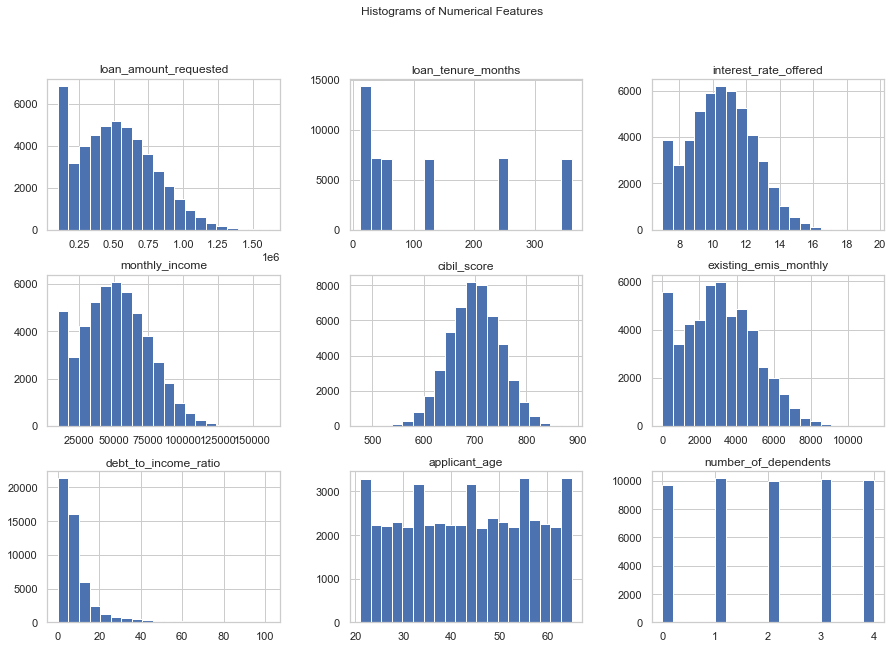

In [7]:
# Histograms for numerical features
df_loan[loan_num_fea].hist(bins=20, figsize=(15,10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

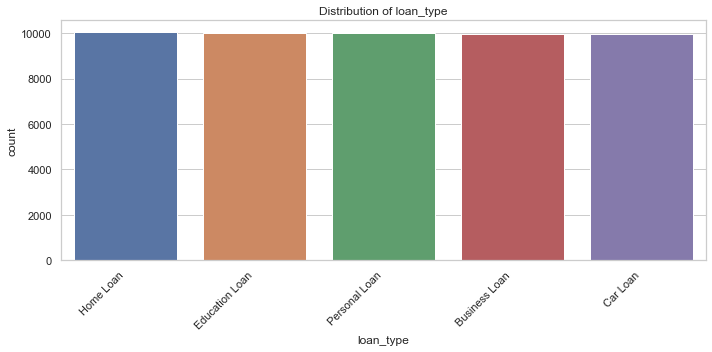

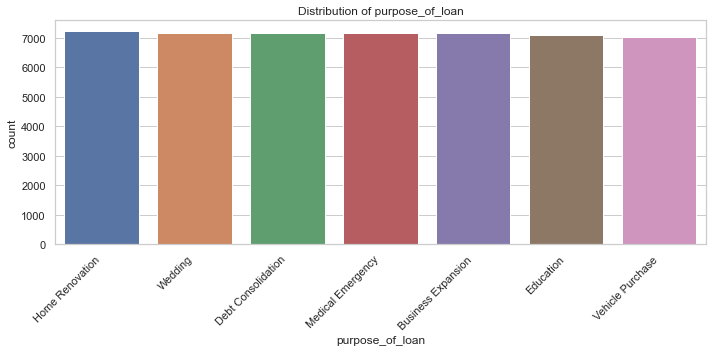

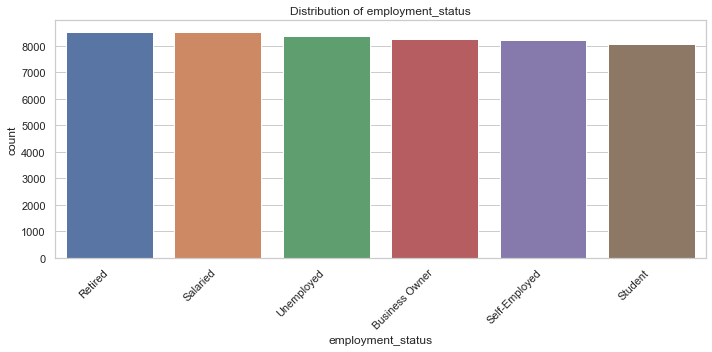

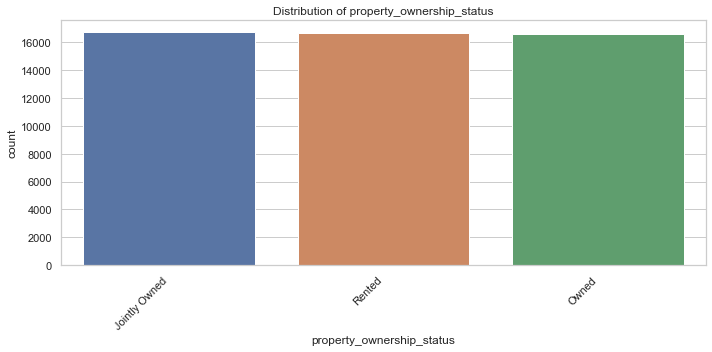

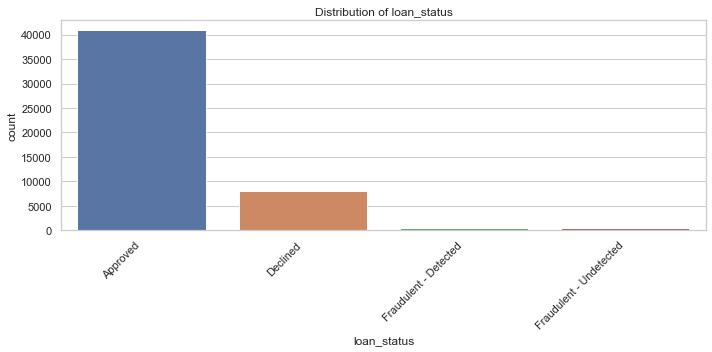

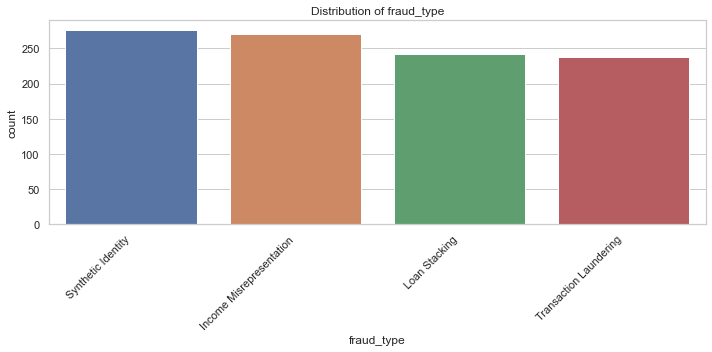

In [8]:
# #Distribution of values of categorical features

# for col in loan_cat_fea:
#     plt.figure(figsize=(10, 5))
#     sns.countplot(data=df_loan, x=col, order=df_loan[col].value_counts().index)
#     plt.title(f"Distribution of {col}")
#     plt.xticks(rotation=45, ha='right')
#     plt.tight_layout()
#     plt.show()

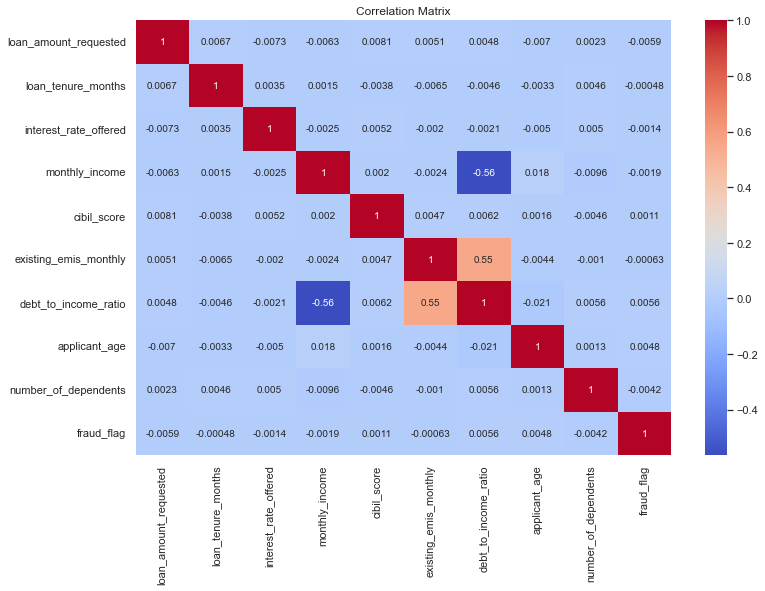

In [11]:
# Correlation matrix

corr = df_loan.select_dtypes(include='number').corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [12]:
# Fraud rate
fraud_rate = df_loan['fraud_flag'].value_counts(normalize=True) * 100
print(fraud_rate.round(2).astype(str) + '%')

0    97.95%
1     2.05%
Name: fraud_flag, dtype: object


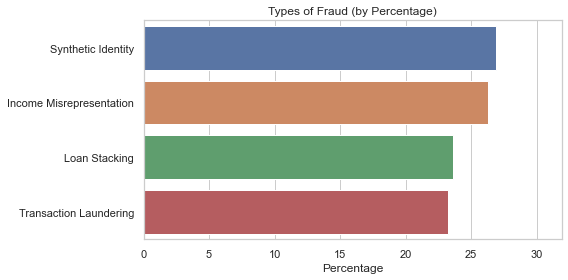

In [13]:
# Calculate percentage per fraud type
fraud_type_pct = (
    df_loan['fraud_type'].value_counts(normalize=True) * 100
).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=fraud_type_pct.values, y=fraud_type_pct.index)
plt.xlabel("Percentage")
plt.title("Types of Fraud (by Percentage)")
plt.xlim(0, fraud_type_pct.max() + 5)  # Add space to the right
plt.tight_layout()
plt.show()

In [16]:
# Your target
target = 'fraud_flag'

# Select categorical features (excluding target)
loan_cat_cols = loan_cat_fea
if target in loan_cat_cols :
    loan_cat_cols.remove(target)

# Select numerical features (excluding target)
loan_num_cols = loan_num_fea
if target in loan_num_cols : 
    loan_num_cols.remove(target)

In [32]:
dfs = []  # To store results for all columns

for col in loan_cat_cols:
    # Create a crosstab: counts of each category by fraud_flag
    ct = pd.crosstab(df_loan[col], df_loan[target], dropna=False)
    
    # Rename target columns
    ct = ct.rename(columns={0: 'legal', 1: 'illegal'})
    
    # Optional: add totals
    ct['Total'] = ct.sum(axis=1)
    
    # Calculate percentages per row
    ct_pct = ct.div(ct['Total'], axis=0) * 100
    ct_pct = ct_pct.round(2)
    
    # Combine counts and percentages in one DataFrame
    combined = ct.astype(str) + " (" + ct_pct.astype(str) + "%)"
    
    # Add a column name to identify which feature this is from
    combined.insert(0, col, combined.index)
    
    dfs.append(combined.reset_index(drop=True))

6

In [35]:
df_fraud_loan_type = dfs[0]
df_fraud_loan_type

fraud_flag,loan_type,legal,illegal,Total
0,Business Loan,9733 (97.71%),228 (2.29%),9961 (100.0%)
1,Car Loan,9745 (98.03%),196 (1.97%),9941 (100.0%)
2,Education Loan,9823 (98.01%),199 (1.99%),10022 (100.0%)
3,Home Loan,9853 (97.98%),203 (2.02%),10056 (100.0%)
4,Personal Loan,9820 (98.0%),200 (2.0%),10020 (100.0%)


In [36]:
df_fraud_loan_purpose = dfs[1]
df_fraud_loan_purpose

fraud_flag,purpose_of_loan,legal,illegal,Total
0,Business Expansion,6999 (97.89%),151 (2.11%),7150 (100.0%)
1,Debt Consolidation,7017 (97.93%),148 (2.07%),7165 (100.0%)
2,Education,6976 (98.24%),125 (1.76%),7101 (100.0%)
3,Home Renovation,7042 (97.4%),188 (2.6%),7230 (100.0%)
4,Medical Emergency,7023 (98.1%),136 (1.9%),7159 (100.0%)
5,Vehicle Purchase,6895 (98.21%),126 (1.79%),7021 (100.0%)
6,Wedding,7022 (97.88%),152 (2.12%),7174 (100.0%)


In [37]:
df_fraud_empl_status = dfs[2]
df_fraud_empl_status

fraud_flag,employment_status,legal,illegal,Total
0,Business Owner,8114 (98.08%),159 (1.92%),8273 (100.0%)
1,Retired,8383 (98.23%),151 (1.77%),8534 (100.0%)
2,Salaried,8321 (97.7%),196 (2.3%),8517 (100.0%)
3,Self-Employed,8044 (97.67%),192 (2.33%),8236 (100.0%)
4,Student,7940 (98.21%),145 (1.79%),8085 (100.0%)
5,Unemployed,8172 (97.81%),183 (2.19%),8355 (100.0%)


In [38]:
df_fraud_ownership = dfs[3]
df_fraud_ownership

fraud_flag,property_ownership_status,legal,illegal,Total
0,Jointly Owned,16378 (97.87%),356 (2.13%),16734 (100.0%)
1,Owned,16263 (97.88%),352 (2.12%),16615 (100.0%)
2,Rented,16333 (98.09%),318 (1.91%),16651 (100.0%)


In [39]:
df_fraud_loan_status = dfs[4]
df_fraud_loan_status

fraud_flag,loan_status,legal,illegal,Total
0,Approved,40882 (100.0%),0 (0.0%),40882 (100.0%)
1,Declined,8092 (100.0%),0 (0.0%),8092 (100.0%)
2,Fraudulent - Detected,0 (0.0%),542 (100.0%),542 (100.0%)
3,Fraudulent - Undetected,0 (0.0%),484 (100.0%),484 (100.0%)


In [40]:
df_fraud_fraudfs[5]

fraud_flag,fraud_type,legal,illegal,Total
0,Income Misrepresentation,0 (0.0%),270 (100.0%),270 (100.0%)
1,Loan Stacking,0 (0.0%),242 (100.0%),242 (100.0%)
2,Synthetic Identity,0 (0.0%),276 (100.0%),276 (100.0%)
3,Transaction Laundering,0 (0.0%),238 (100.0%),238 (100.0%)


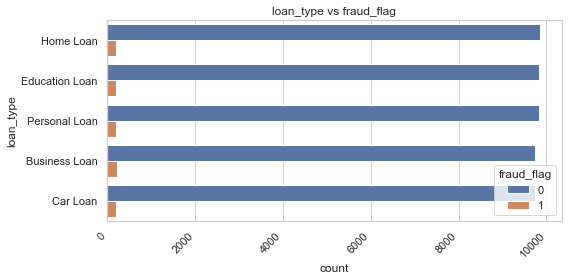

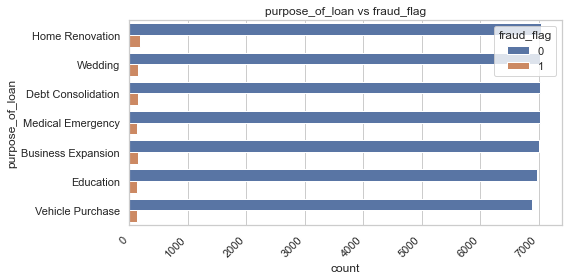

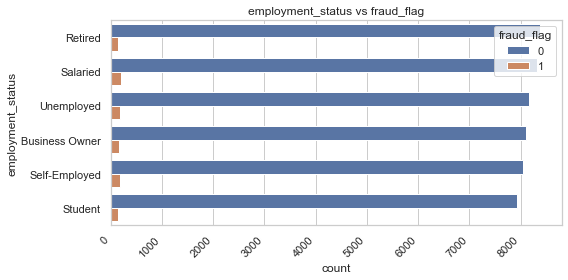

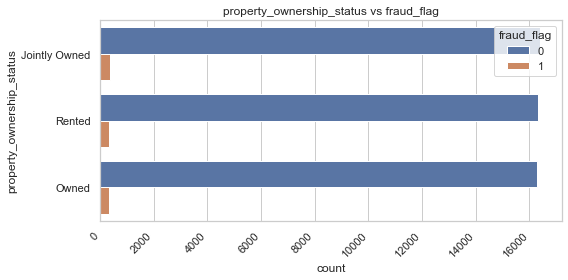

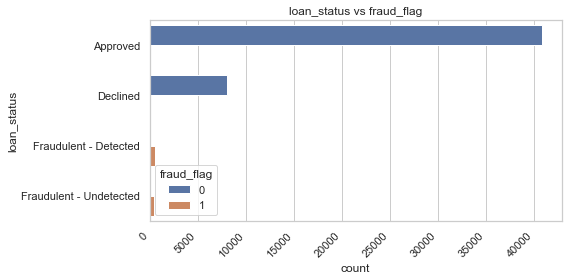

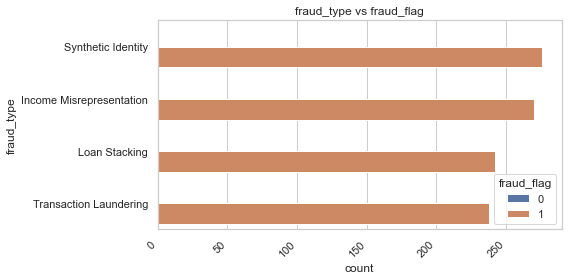

In [22]:
# # Plot categorical features vs fraud_flag (countplots)
# for col in loan_cat_cols:
#     plt.figure(figsize=(8,4))
#     sns.countplot(data=df_loan, y=col, hue=target, order=df_loan[col].value_counts().index)
#     plt.title(f"{col} vs {target}")
#     plt.xticks(rotation=45, ha='right')
#     plt.tight_layout()
#     plt.show()

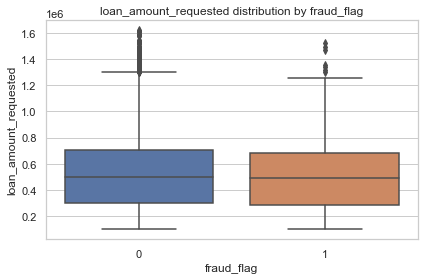

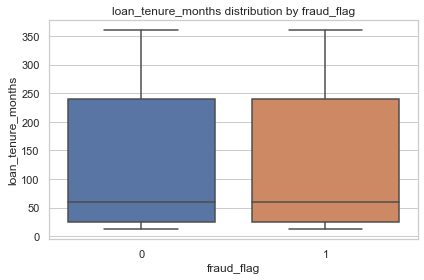

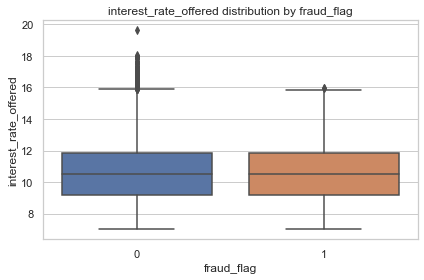

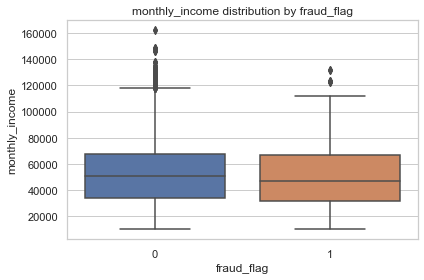

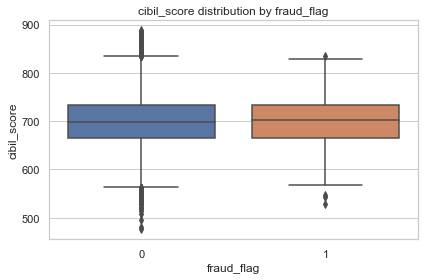

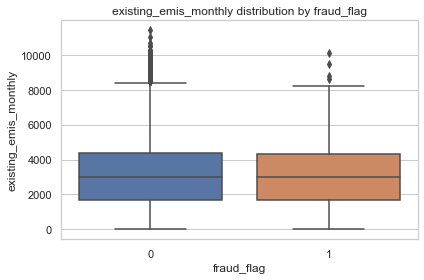

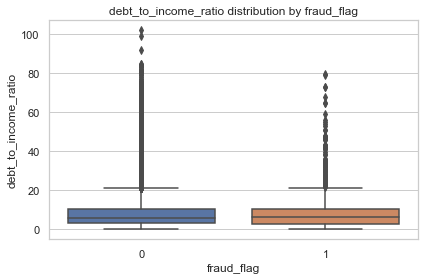

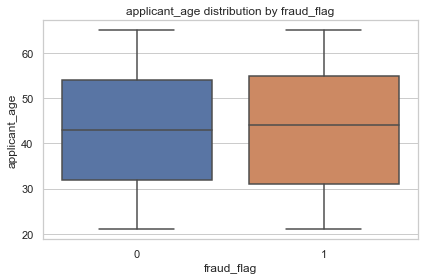

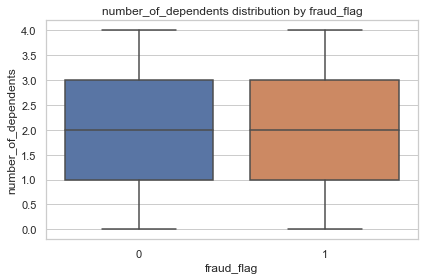

In [19]:
# Plot numerical features vs fraud_flag (boxplots)
for col in loan_num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_loan, x=target, y=col)
    plt.title(f"{col} distribution by {target}")
    plt.tight_layout()
    plt.show()

# 2.2 Transactions DB

In [ ]:
# Display an overview about transactions dataset
df_transaction.info()

In [ ]:
# List of categorical features
transaction_cat_fea = [ 'transaction_type', 'merchant_category','device_used','transaction_status','transaction_notes']

In [ ]:
# Distinct value counts for each non-numerical column in the dataset.

for col in transaction_cat_fea:
    print(f"Column: {col}")
    print(df_transaction[col].value_counts(dropna=False))  # includes NaN counts if any
    print("\n" + "-"*40 + "\n")